# Objectives

#### Visualise data to find out the following things<br> from multipile tables in the database (SQL applied in this task)
- Top 5 databases that respondents wish to learn next year
- Job types of the respondents, and how it respondes to genders
- Distribution of compensation
- Distribution of age
- Relation between age and weekly work hours
- For different age groups,their weekly work hours and weekly code review hours
- The trend of median annual salary for different age groups

In [200]:
import sqlite3

#create a connection object
conn=sqlite3.connect('survey_data.sqlite')

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
query="select * from sqlite_master where type='table'"
pd.read_sql_query(query,conn)

,type,name,tbl_name,rootpage,sql
0,table,EduOther,EduOther,2,"CREATE TABLE ""EduOther"" (\n""Respondent"" INTEGE..."
1,table,DevType,DevType,741,"CREATE TABLE ""DevType"" (\n""Respondent"" INTEGER..."
2,table,LastInt,LastInt,1024,"CREATE TABLE ""LastInt"" (\n""Respondent"" INTEGER..."
3,table,JobFactors,JobFactors,1355,"CREATE TABLE ""JobFactors"" (\n""Respondent"" INTE..."
4,table,WorkPlan,WorkPlan,1808,"CREATE TABLE ""WorkPlan"" (\n""Respondent"" INTEGE..."
5,table,WorkChallenge,WorkChallenge,2088,"CREATE TABLE ""WorkChallenge"" (\n""Respondent"" I..."
6,table,LanguageWorkedWith,LanguageWorkedWith,2378,"CREATE TABLE ""LanguageWorkedWith"" (\n""Responde..."
7,table,LanguageDesireNextYear,LanguageDesireNextYear,2638,"CREATE TABLE ""LanguageDesireNextYear"" (\n""Resp..."
8,table,DatabaseWorkedWith,DatabaseWorkedWith,2877,"CREATE TABLE ""DatabaseWorkedWith"" (\n""Responde..."
9,table,DatabaseDesireNextYear,DatabaseDesireNextYear,3028,"CREATE TABLE ""DatabaseDesireNextYear"" (\n""Resp..."


#### Top 5 databases that respondents wish to learn next year

In [64]:
# get the data from table DatabaseDesireNextYear
query="select * from DatabaseDesireNextYear"
df_database_desire=pd.read_sql_query(query,conn)
df_database_desire.head()

df_database_desire_group=df_database_desire.groupby(['DatabaseDesireNextYear']).count().sort_values(by='Respondent')

total=df_database_desire_group['Respondent'].sum()
df_database_desire_group['Pert']=100*df_database_desire_group['Respondent']/total
df_database_desire_5=df_database_desire_group[['Pert']].iloc[-5:]
df_database_desire_5

,Pert
DatabaseDesireNextYear,
Elasticsearch,9.656805
MySQL,11.093829
Redis,11.262891
MongoDB,12.338123
PostgreSQL,14.633981


Text(0.5, 1.0, 'Top 5 Databases for future')

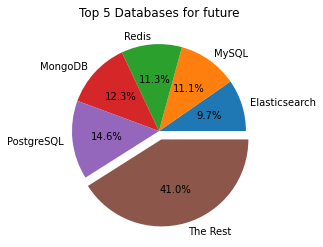

In [101]:
# Draw the pie chart
other=df_database_desire_group.iloc[0:9]['Pert'].sum()
df_draw=df_database_desire_5.append({'Pert':other},ignore_index=True)

fig,ax=plt.subplots()

data=df_draw["Pert"].values
labels=np.append(df_database_desire_5.index.values,'The Rest')
explode=(0,0,0,0,0,0.1)

ax.pie(data,explode=explode,labels=labels,autopct='%1.1f%%')
ax.axis=('equal')
ax.set_title('Top 5 Databases for future')

#### Job types of the respondents, and how it respondes to genders

In [204]:
query = "select d.Respondent,d.DevType,g.Gender from DevType d,Gender g\
            where g.Respondent = d.Respondent"

df_type = pd.read_sql_query(query,conn)
df_type.head()

,Respondent,DevType,Gender
0,4,"Developer, full-stack",Man
1,9,Database administrator,Man
2,9,"Developer, back-end",Man
3,9,"Developer, front-end",Man
4,9,"Developer, full-stack",Man


In [224]:
df_type_group=df_type.groupby(['DevType','Gender']).count().unstack().Respondent
df_type_man=df_type_group.sort_values(by='Man').iloc[-5:,0],
df_type_woman=df_type_group.sort_values(by='Woman').iloc[-5:,2]
print(df_type_man,df_type_woman)

(DevType
Developer, mobile                                1834.0
Developer, desktop or enterprise applications    2432.0
Developer, front-end                             3608.0
Developer, back-end                              5877.0
Developer, full-stack                            6474.0
Name: Man, dtype: float64,) DevType
Developer, desktop or enterprise applications    108.0
Developer, mobile                                112.0
Developer, front-end                             269.0
Developer, back-end                              344.0
Developer, full-stack                            380.0
Name: Woman, dtype: float64


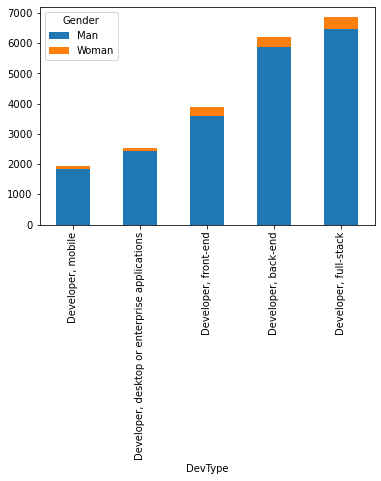

In [243]:
# it shows the top 5 job types of respondents are the same for both man and woman

top_5=df_type_group.sort_values(by='Man').iloc[-5:,0].index
df_top_5=df_type_group.loc[top_5,:].drop(columns=['Non-binary, genderqueer, or gender non-conforming'])

df_top_5.plot(kind='bar',stacked=True)

#### Distribution of compensation

In [10]:
# the data is in table master
query="select * from master"
df_master=pd.read_sql_query(query,conn)
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 63 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           11398 non-null  int64  
 1   Respondent      11398 non-null  int64  
 2   MainBranch      11398 non-null  object 
 3   Hobbyist        11398 non-null  object 
 4   OpenSourcer     11398 non-null  object 
 5   OpenSource      11317 non-null  object 
 6   Employment      11398 non-null  object 
 7   Country         11398 non-null  object 
 8   Student         11347 non-null  object 
 9   EdLevel         11286 non-null  object 
 10  UndergradMajor  10661 non-null  object 
 11  OrgSize         11302 non-null  object 
 12  YearsCode       11389 non-null  object 
 13  Age1stCode      11385 non-null  object 
 14  YearsCodePro    11382 non-null  object 
 15  CareerSat       11398 non-null  object 
 16  JobSat          11397 non-null  object 
 17  MgrIdiot        10905 non-null 

Text(0.5, 1.0, 'Histogram of Annual Salary for All Respondents')

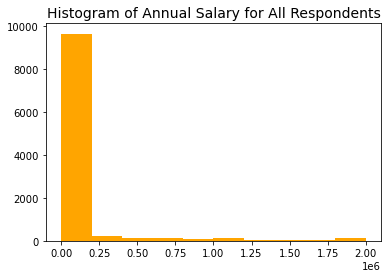

In [13]:
plt.hist(df_master['ConvertedComp'],color='orange')
plt.title('Histogram of Annual Salary for All Respondents',fontsize=14)

- The annual salary distribution is positively skewed<br>
so the median value can better indicate the average level than mean value.

#### Distribution of age

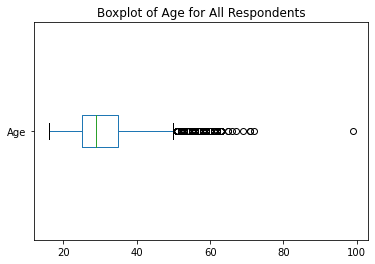

In [24]:
df_master[['Age']].plot(kind='box',vert=False,title='Boxplot of Age for All Respondents')

- The age group from 20 to 40 includes more than 50% of respondents.

#### Relation between age and weekly work hours

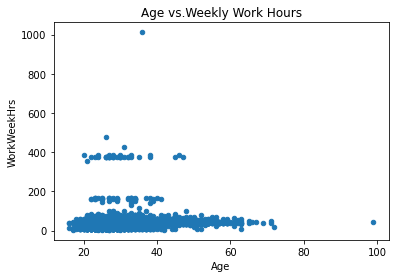

In [31]:
df_master[['Age','WorkWeekHrs']].plot(kind='scatter',x='Age',y='WorkWeekHrs',title='Age vs.Weekly Work Hours')

- From the plot, it shows no relationship between these 2 features: age and weekly work hours.

#### For different age groups,their weekly work hours and weekly code review hours

In [104]:
# Since missing values will impact the analysis, we will firstly drop the values
df_stacked=df_master[['Age','WorkWeekHrs','CodeRevHrs']]
df_stacked.isnull().sum()

Age             287
WorkWeekHrs     122
CodeRevHrs     2426
dtype: int64

In [110]:
df_stacked=df_stacked[(df_stacked['CodeRevHrs'].notnull()) & (df_stacked['WorkWeekHrs'].notnull()) & (df_stacked['Age'].notnull())]
df_stacked.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8669 entries, 1 to 11397
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          8669 non-null   float64
 1   WorkWeekHrs  8669 non-null   float64
 2   CodeRevHrs   8669 non-null   float64
dtypes: float64(3)
memory usage: 270.9 KB


In [119]:
print(df_stacked['Age'].min(),df_stacked['Age'].max())

16.0 99.0


In [130]:
# since there is only one record of 99 years old, will leave it for analysis
 #df_stacked[df_stacked['Age']==99]

# categorise age into 5 groups
df_stacked['Age_Group']=pd.cut(df_stacked['Age'],bins=[0,25,35,45,60,100])
df_stacked.head()

,Age,WorkWeekHrs,CodeRevHrs,Age_Group
1,23.0,32.0,12.0,"(0, 25]"
2,28.0,40.0,5.0,"(25, 35]"
4,29.0,45.0,5.0,"(25, 35]"
5,31.0,8.0,3.0,"(25, 35]"
6,38.0,140.0,1.0,"(35, 45]"


Text(0.5, 1.0, 'Weekly Work Hours vs. Weekly Code Review Hours in Different Age Group')

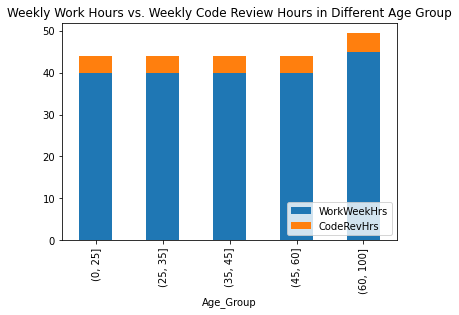

In [138]:
df_stacked[['WorkWeekHrs','CodeRevHrs','Age_Group']].groupby(['Age_Group']).median().plot(kind='bar',stacked=True)
plt.legend(loc='lower right')
plt.title('Weekly Work Hours vs. Weekly Code Review Hours in Different Age Group')

- It shows that there is no big difference among age groups<br>
except for age groups of over 60 years old in terms of weekly work hours and code review hours.

#### The trend of median annual salary for different age groups

In [141]:
df_age_salary=df_master[['Age','ConvertedComp']]
df_age_salary.isnull().sum()

Age              287
ConvertedComp    816
dtype: int64

In [144]:
df_age_salary=df_age_salary[(df_age_salary['Age'].notnull()) & (df_age_salary['ConvertedComp'].notnull())]

In [145]:
df_age_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10354 entries, 0 to 11396
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            10354 non-null  float64
 1   ConvertedComp  10354 non-null  float64
dtypes: float64(2)
memory usage: 242.7 KB


In [186]:
# we will divide age into more details groups in terms of this
bins=np.arange(15,110,5)
df_age_salary['Age_Group']=pd.cut(df_age_salary['Age'],bins=bins).astype('str')
df_age_salary.head()

,Age,ConvertedComp,Age_Group
0,22.0,61000.0,"(20, 25]"
1,23.0,95179.0,"(20, 25]"
2,28.0,90000.0,"(25, 30]"
3,26.0,455352.0,"(25, 30]"
4,29.0,65277.0,"(25, 30]"


In [187]:
# get the data for plot
df_age_salary_group=df_age_salary.groupby(['Age_Group']).agg({'ConvertedComp':'median'}).dropna()

Text(0.5, 1.0, 'Median Salary for Different Age Groups')

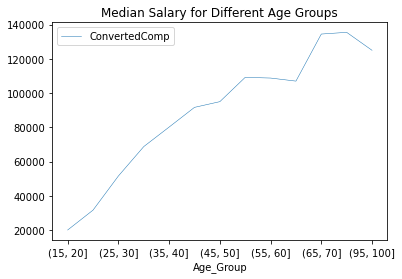

In [197]:
df_age_salary_group.plot(kind='line',linewidth=0.5)
plt.title('Median Salary for Different Age Groups')

- It shows that median salary increase with the increase in age generally.

In [244]:
# close connection to database
conn.close()